In [20]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


#EdSigh Ed-Tech is a globally recognized online learning
platform that provides a wide range of courses on a variety of topics.
Since its inception in 2010, EdSigh Ed-Tech has grown to become one of
the world's largest e-learning platforms, serving millions of students
and teachers worldwide.

EdSigh Ed-Tech's primary goal is to make education
accessible and affordable to anyone with an internet connection.
Teachers create and publish their courses on the platform, and
students can enroll based on their interests and learning goals.

EdSigh Ed-Tech offers certifications and training in courses,
such as Business Finance, Graphics Design, Musical Instruments, and
Web Development. EdSigh Ed-Tech 's extensive course catalog ranges
from technology to business, art to personal growth.

PROBLEM OVERVIEW

The Director of EdSigh Ed-Tech
contacted you and your team of Data
Scientists because they are interested in
leveraging the power of their data to gain
insights into the business and improve
their efficiency.

EdSigh Ed-Tech seeks to understand the
performance of each course.

In [15]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
import missingno as msno
from collections import Counter
import pandas_profiling
from pandas_profiling import ProfileReport

In [16]:
# Load the dataset by Copying file path
df = pd.read_csv(r"C:\Users\Emmanuel.Ikukoyi.WAKANOW\Downloads\EdSigh Ed-Tech.csv")

In [17]:
#Print the top 5rows
df.head(5)

Course_ID  Num_Subscribers  \
0      49798            65576   
1      48841            56659   
2     133536            50855   
3     151668            29167   
4     648826            24481   

                                        Course_Title  Price  Num_Review  \
0  Bitcoin or How I Learned to Stop Worrying and ...      0         936   
1    Accounting in 60 Minutes - A Brief Introduction      0        4397   
2               Stock Market Investing for Beginners      0        2698   
3                 Introduction to Financial Modeling      0        1463   
4         The Complete Financial Analyst Course 2017    195        2347   

   Num_Lectures           Level  Rating  Content_Duration  \
0            24      All Levels    0.56               8.0   
1            16  Beginner Level    0.95               1.5   
2            15      All Levels    0.91               1.5   
3             8      All Levels    0.18               1.5   
4           174      All Levels    0.37              10.0   

    Published_Timestamp           Subject Date_Published Course_Type  
0  2013-04-20T02:25:22Z  Business Finance      4/20/2013        Free  
1  2013-04-07T21:39:25Z  Business Finance       4/7/2013        Free  
2  2013-12-25T19:53:34Z  Business Finance     12/25/2013        Free  
3  2014-05-27T16:22:16Z  Business Finance      5/27/2014        Free  
4  2016-01-21T01:38:48Z  Business Finance      1/21/2016        Paid

In [25]:
# Column selection
df.columns

Index(['Course_ID', 'Num_Subscribers', 'Course_Title', 'Price', 'Num_Review',
       'Num_Lectures', 'Level', 'Rating', 'Content_Duration',
       'Published_Timestamp', 'Subject', 'Date_Published', 'Course_Type'],
      dtype='object')

In [26]:
# Categorical Statistical Analysis
df.describe(include=['object','bool'])

Course_Title       Level   Published_Timestamp  \
count                            3676        3676                  3676   
unique                           3663           4                  3672   
top     Acoustic Blues Guitar Lessons  All Levels  2017-02-07T17:20:39Z   
freq                                3        1925                     2   

                Subject Date_Published Course_Type  
count              3676           3676        3676  
unique                4           1210           2  
top     Web Development       5/1/2017        Paid  
freq               1203             21        3365

In [27]:
#Dimensionality of the dataset
df.shape

(3676, 13)

In [28]:
#Creating a duplicate
df1=df.copy()
df1.head(2)

Course_ID  Num_Subscribers  \
0      49798            65576   
1      48841            56659   

                                        Course_Title  Price  Num_Review  \
0  Bitcoin or How I Learned to Stop Worrying and ...      0         936   
1    Accounting in 60 Minutes - A Brief Introduction      0        4397   

   Num_Lectures           Level  Rating  Content_Duration  \
0            24      All Levels    0.56               8.0   
1            16  Beginner Level    0.95               1.5   

    Published_Timestamp           Subject Date_Published Course_Type  
0  2013-04-20T02:25:22Z  Business Finance      4/20/2013        Free  
1  2013-04-07T21:39:25Z  Business Finance       4/7/2013        Free

In [29]:
# Investigating the Missing Data
print(df.isnull().sum())

Course_ID              0
Num_Subscribers        0
Course_Title           0
Price                  0
Num_Review             0
Num_Lectures           0
Level                  0
Rating                 0
Content_Duration       0
Published_Timestamp    0
Subject                0
Date_Published         0
Course_Type            0
dtype: int64


The above shows there are no missing data.

In [30]:
#Removing the rows that contains null values
df.dropna(inplace=True)

In [31]:
df1.head(10)

Course_ID  Num_Subscribers  \
0      49798            65576   
1      48841            56659   
2     133536            50855   
3     151668            29167   
4     648826            24481   
5      97338            22344   
6     321410            22257   
7     301442            20195   
8     189160            19614   
9     191854            19339   

                                        Course_Title  Price  Num_Review  \
0  Bitcoin or How I Learned to Stop Worrying and ...      0         936   
1    Accounting in 60 Minutes - A Brief Introduction      0        4397   
2               Stock Market Investing for Beginners      0        2698   
3                 Introduction to Financial Modeling      0        1463   
4         The Complete Financial Analyst Course 2017    195        2347   
5                                       Forex Basics      0         712   
6  Beginner to Pro in Excel: Financial Modeling a...    195        2697   
7       Black Algo Trading: Build Your Trading Robot    200        1113   
8           Financial Analysis: A Recipe for Success      0         635   
9                           Stock Market Foundations      0         794   

   Num_Lectures               Level  Rating  Content_Duration  \
0            24          All Levels    0.56               8.0   
1            16      Beginner Level    0.95               1.5   
2            15          All Levels    0.91               1.5   
3             8          All Levels    0.18               1.5   
4           174          All Levels    0.37              10.0   
5            26          All Levels    0.89               3.5   
6           138  Intermediate Level    0.13               7.5   
7           227          All Levels    0.21              16.0   
8            14          All Levels    0.30               1.5   
9             9          All Levels    0.89               2.0   

    Published_Timestamp           Subject Date_Published Course_Type  
0  2013-04-20T02:25:22Z  Business Finance      4/20/2013        Free  
1  2013-04-07T21:39:25Z  Business Finance       4/7/2013        Free  
2  2013-12-25T19:53:34Z  Business Finance     12/25/2013        Free  
3  2014-05-27T16:22:16Z  Business Finance      5/27/2014        Free  
4  2016-01-21T01:38:48Z  Business Finance      1/21/2016        Paid  
5  2013-10-16T17:40:23Z  Business Finance     10/16/2013        Free  
6  2014-11-25T23:00:40Z  Business Finance     11/25/2014        Paid  
7  2014-10-27T22:01:36Z  Business Finance     10/27/2014        Paid  
8  2014-04-23T15:10:52Z  Business Finance      4/23/2014        Free  
9  2014-03-31T21:35:06Z  Business Finance      3/31/2014        Free

In [32]:
#Investigating the dataset for anomalies and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3676 entries, 0 to 3675
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Course_ID            3676 non-null   int64  
 1   Num_Subscribers      3676 non-null   int64  
 2   Course_Title         3676 non-null   object 
 3   Price                3676 non-null   int64  
 4   Num_Review           3676 non-null   int64  
 5   Num_Lectures         3676 non-null   int64  
 6   Level                3676 non-null   object 
 7   Rating               3676 non-null   float64
 8   Content_Duration     3676 non-null   float64
 9   Published_Timestamp  3676 non-null   object 
 10  Subject              3676 non-null   object 
 11  Date_Published       3676 non-null   object 
 12  Course_Type          3676 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 373.5+ KB


There are no anomalies in the dataset.

In [33]:
#Numerical Statistical Analysis
df.describe()

Course_ID  Num_Subscribers        Price    Num_Review  Num_Lectures  \
count  3.676000e+03      3676.000000  3676.000000   3676.000000   3676.000000   
mean   6.757535e+05      3199.260881    66.115343    156.309848     40.129761   
std    3.431304e+05      9486.582966    61.056073    935.674518     50.398507   
min    8.324000e+03         0.000000     0.000000      0.000000      0.000000   
25%    4.074740e+05       112.000000    20.000000      4.000000     15.000000   
50%    6.876920e+05       912.500000    45.000000     18.000000     25.000000   
75%    9.608140e+05      2558.000000    95.000000     67.000000     46.000000   
max    1.282064e+06    268923.000000   200.000000  27445.000000    779.000000   

            Rating  Content_Duration  
count  3676.000000       3676.000000  
mean      0.610868          4.096137  
std       0.334287          6.054948  
min       0.000000          0.000000  
25%       0.280000          1.000000  
50%       0.760000          2.000000  
75%       0.930000          4.500000  
max       1.000000         78.500000

In [34]:
# Print the top 5 rows
df.head(5)

Course_ID  Num_Subscribers  \
0      49798            65576   
1      48841            56659   
2     133536            50855   
3     151668            29167   
4     648826            24481   

                                        Course_Title  Price  Num_Review  \
0  Bitcoin or How I Learned to Stop Worrying and ...      0         936   
1    Accounting in 60 Minutes - A Brief Introduction      0        4397   
2               Stock Market Investing for Beginners      0        2698   
3                 Introduction to Financial Modeling      0        1463   
4         The Complete Financial Analyst Course 2017    195        2347   

   Num_Lectures           Level  Rating  Content_Duration  \
0            24      All Levels    0.56               8.0   
1            16  Beginner Level    0.95               1.5   
2            15      All Levels    0.91               1.5   
3             8      All Levels    0.18               1.5   
4           174      All Levels    0.37              10.0   

    Published_Timestamp           Subject Date_Published Course_Type  
0  2013-04-20T02:25:22Z  Business Finance      4/20/2013        Free  
1  2013-04-07T21:39:25Z  Business Finance       4/7/2013        Free  
2  2013-12-25T19:53:34Z  Business Finance     12/25/2013        Free  
3  2014-05-27T16:22:16Z  Business Finance      5/27/2014        Free  
4  2016-01-21T01:38:48Z  Business Finance      1/21/2016        Paid

In [35]:
# Convert to Percentage
def perc_plot(plot,feature):
  total = len(feature)
  for p in plot.patches:
    perc = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(perc,(x,y), size=12)
  plt.show()

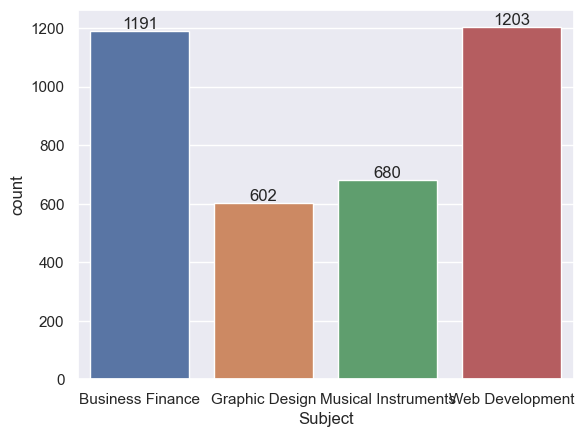

In [24]:
#Univariate Analysis
ax = sns.countplot(x='Subject', data=df)
for p in ax.patches: ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

Business Finance and Web Development are the most sought after course.

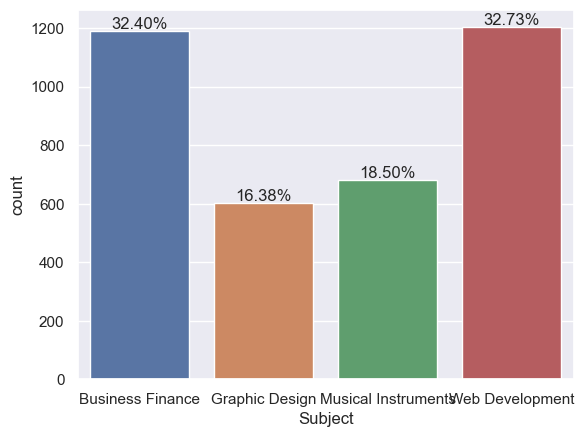

In [23]:
ax = sns.countplot(x='Subject', data=df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

Graphic design has 16.38% which is the lowest offered course.

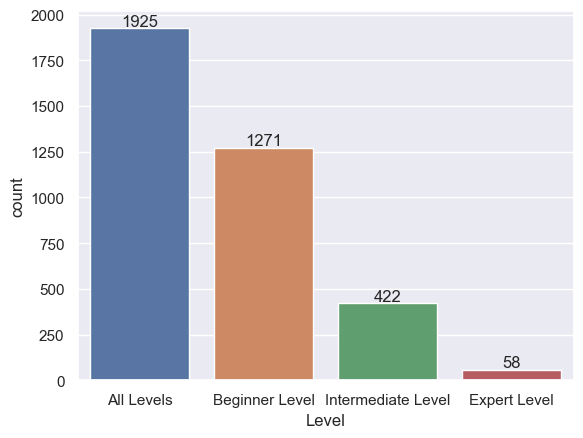

In [41]:
ax = sns.countplot(x='Level', data=df)
for p in ax.patches: ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

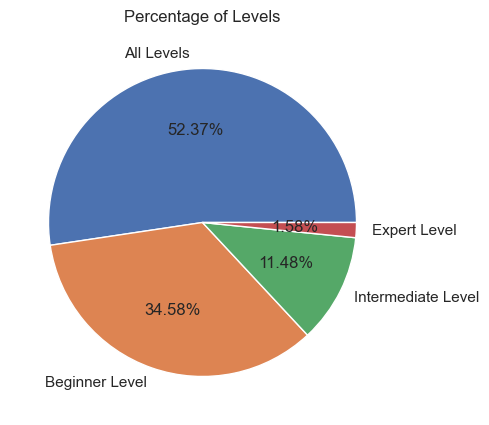

In [35]:
fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df['Level'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title('Percentage of Levels')
plt.show();

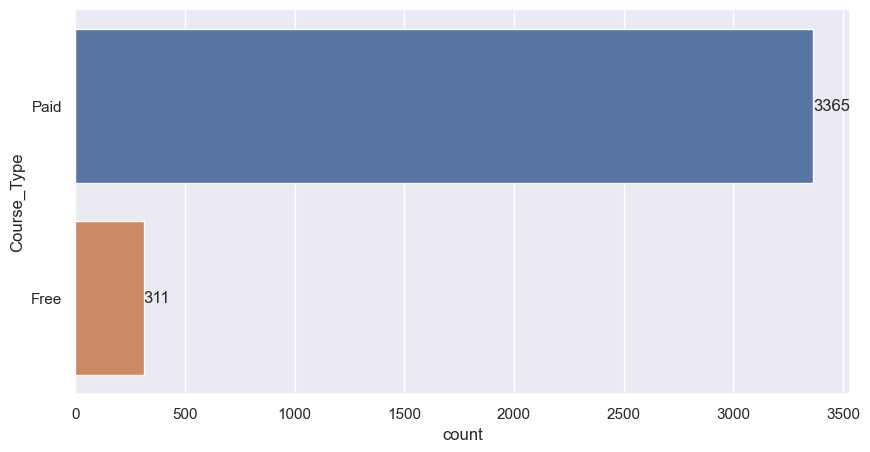

In [43]:
plt.figure(figsize=(10,5))
ax = sns.countplot(y=df1['Course_Type'], order=df1['Course_Type'].value_counts(ascending=False).index)
values = df1['Course_Type'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

In [44]:
# BIVARIATE ANALYSIS
df.columns


Index(['Course_ID', 'Num_Subscribers', 'Course_Title', 'Price', 'Num_Review',
       'Num_Lectures', 'Level', 'Rating', 'Content_Duration',
       'Published_Timestamp', 'Subject', 'Date_Published', 'Course_Type'],
      dtype='object')

In [36]:
# Group by Subject and count the prices
cust_SubP = df.groupby("Subject")["Price"].count().reset_index()


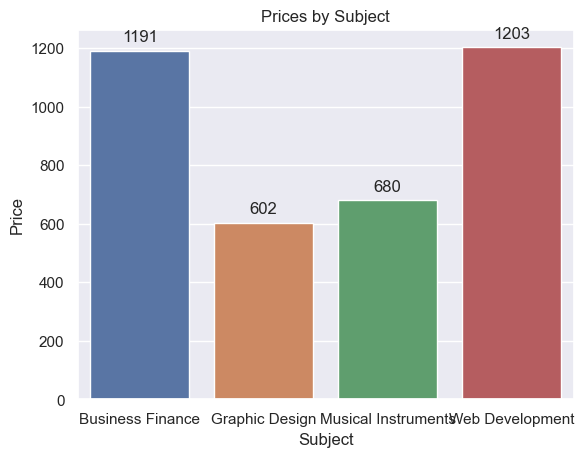

In [53]:
# Create a bar plot
fig, axs = plt.subplots()
sns.barplot(x='Subject', y='Price', data=cust_SubP, ax=axs)
axs.set_title("Prices by Subject")
for p in axs.patches:
    axs.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

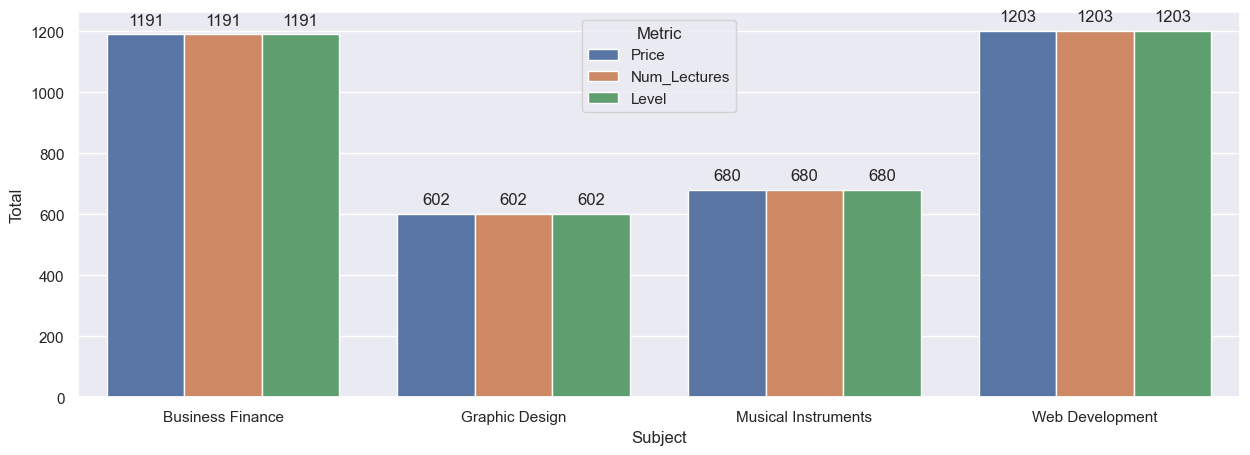

In [60]:
#Multi Variate Analysis
plt.figure(figsize=(15, 5))

Sub_Price = df1.groupby("Subject")[["Price", "Num_Lectures", "Level"]].count().reset_index()
Sub_Price = pd.melt(Sub_Price, id_vars="Subject", var_name="Metric", value_name="Total")

ax = sns.barplot(data=Sub_Price, x='Subject', y="Total", hue="Metric")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

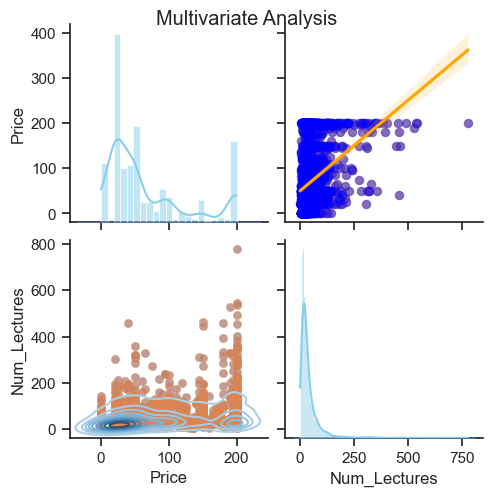

In [65]:
variables = ["Subject", "Price", "Num_Lectures"]
sns.set(style="ticks")
pairplot = sns.pairplot(df1[variables], markers="o", diag_kind="kde", plot_kws={"alpha": 0.5})
pairplot.map_diag(sns.histplot, kde=True, color="skyblue")
pairplot.map_offdiag(sns.scatterplot, alpha=0.5, edgecolor=None)
pairplot.map_upper(sns.regplot, scatter_kws={"alpha": 0.3, "color": "blue"}, line_kws={"color": "orange"})
pairplot.map_lower(sns.kdeplot, cmap="Blues_d")
plt.subplots_adjust(top=0.95)
plt.suptitle('Multivariate Analysis')
plt.show()

In [69]:
# Creating a Pivot Table
df1.pivot_table(values='Price', index='Subject', columns='Level', aggfunc='sum')

Level                All Levels  Beginner Level  Expert Level  \
Subject                                                         
Business Finance          44435           27425          1645   
Graphic Design            20810            9325           200   
Musical Instruments       16065           13030           580   
Web Development           47190           33145           940   

Level                Intermediate Level  
Subject                                  
Business Finance                   8310  
Graphic Design                     4515  
Musical Instruments                4025  
Web Development                   11400

<Axes: >

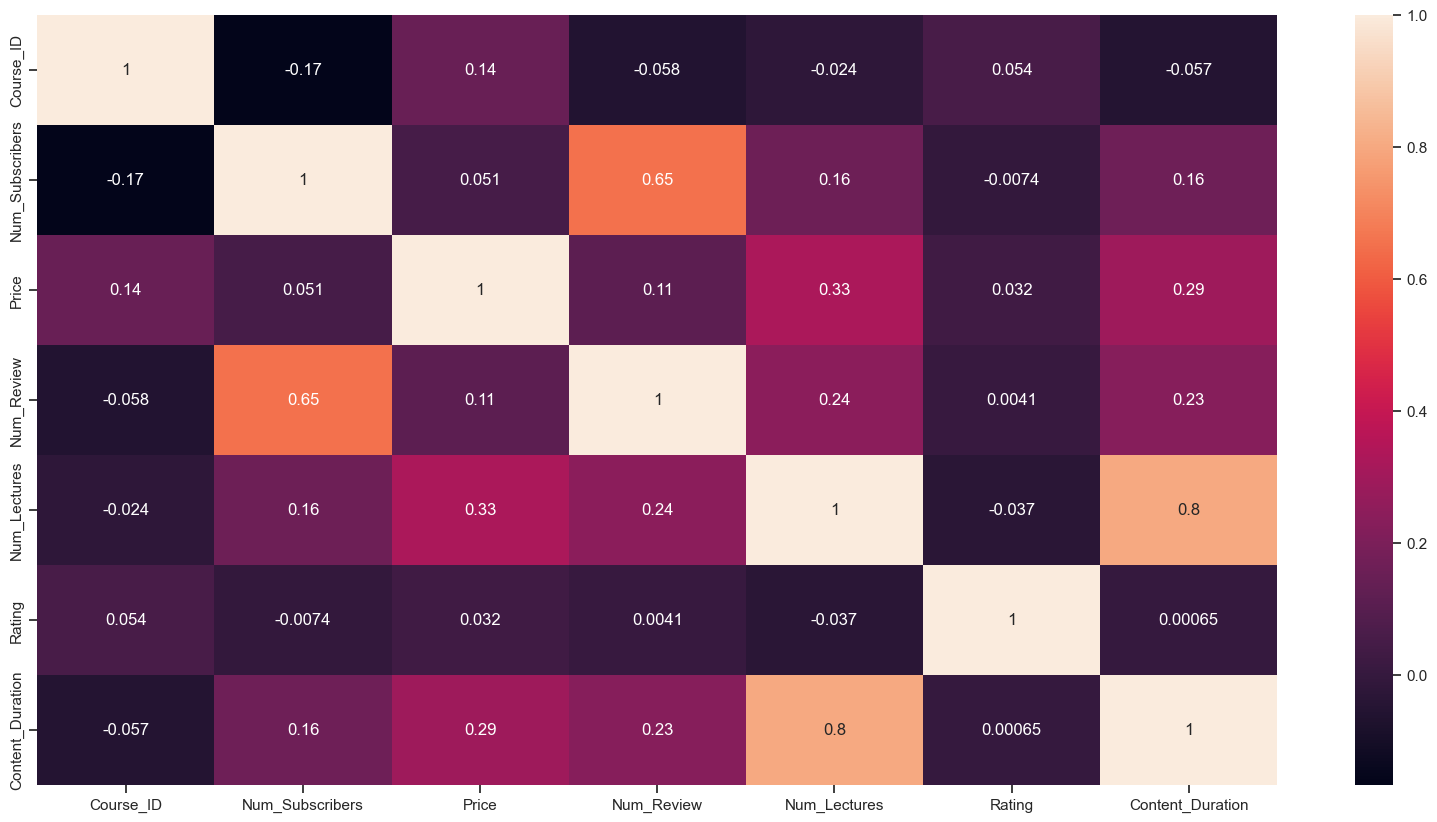

In [70]:
# Relationships through Correlation
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True)

In [9]:
import seaborn as sns


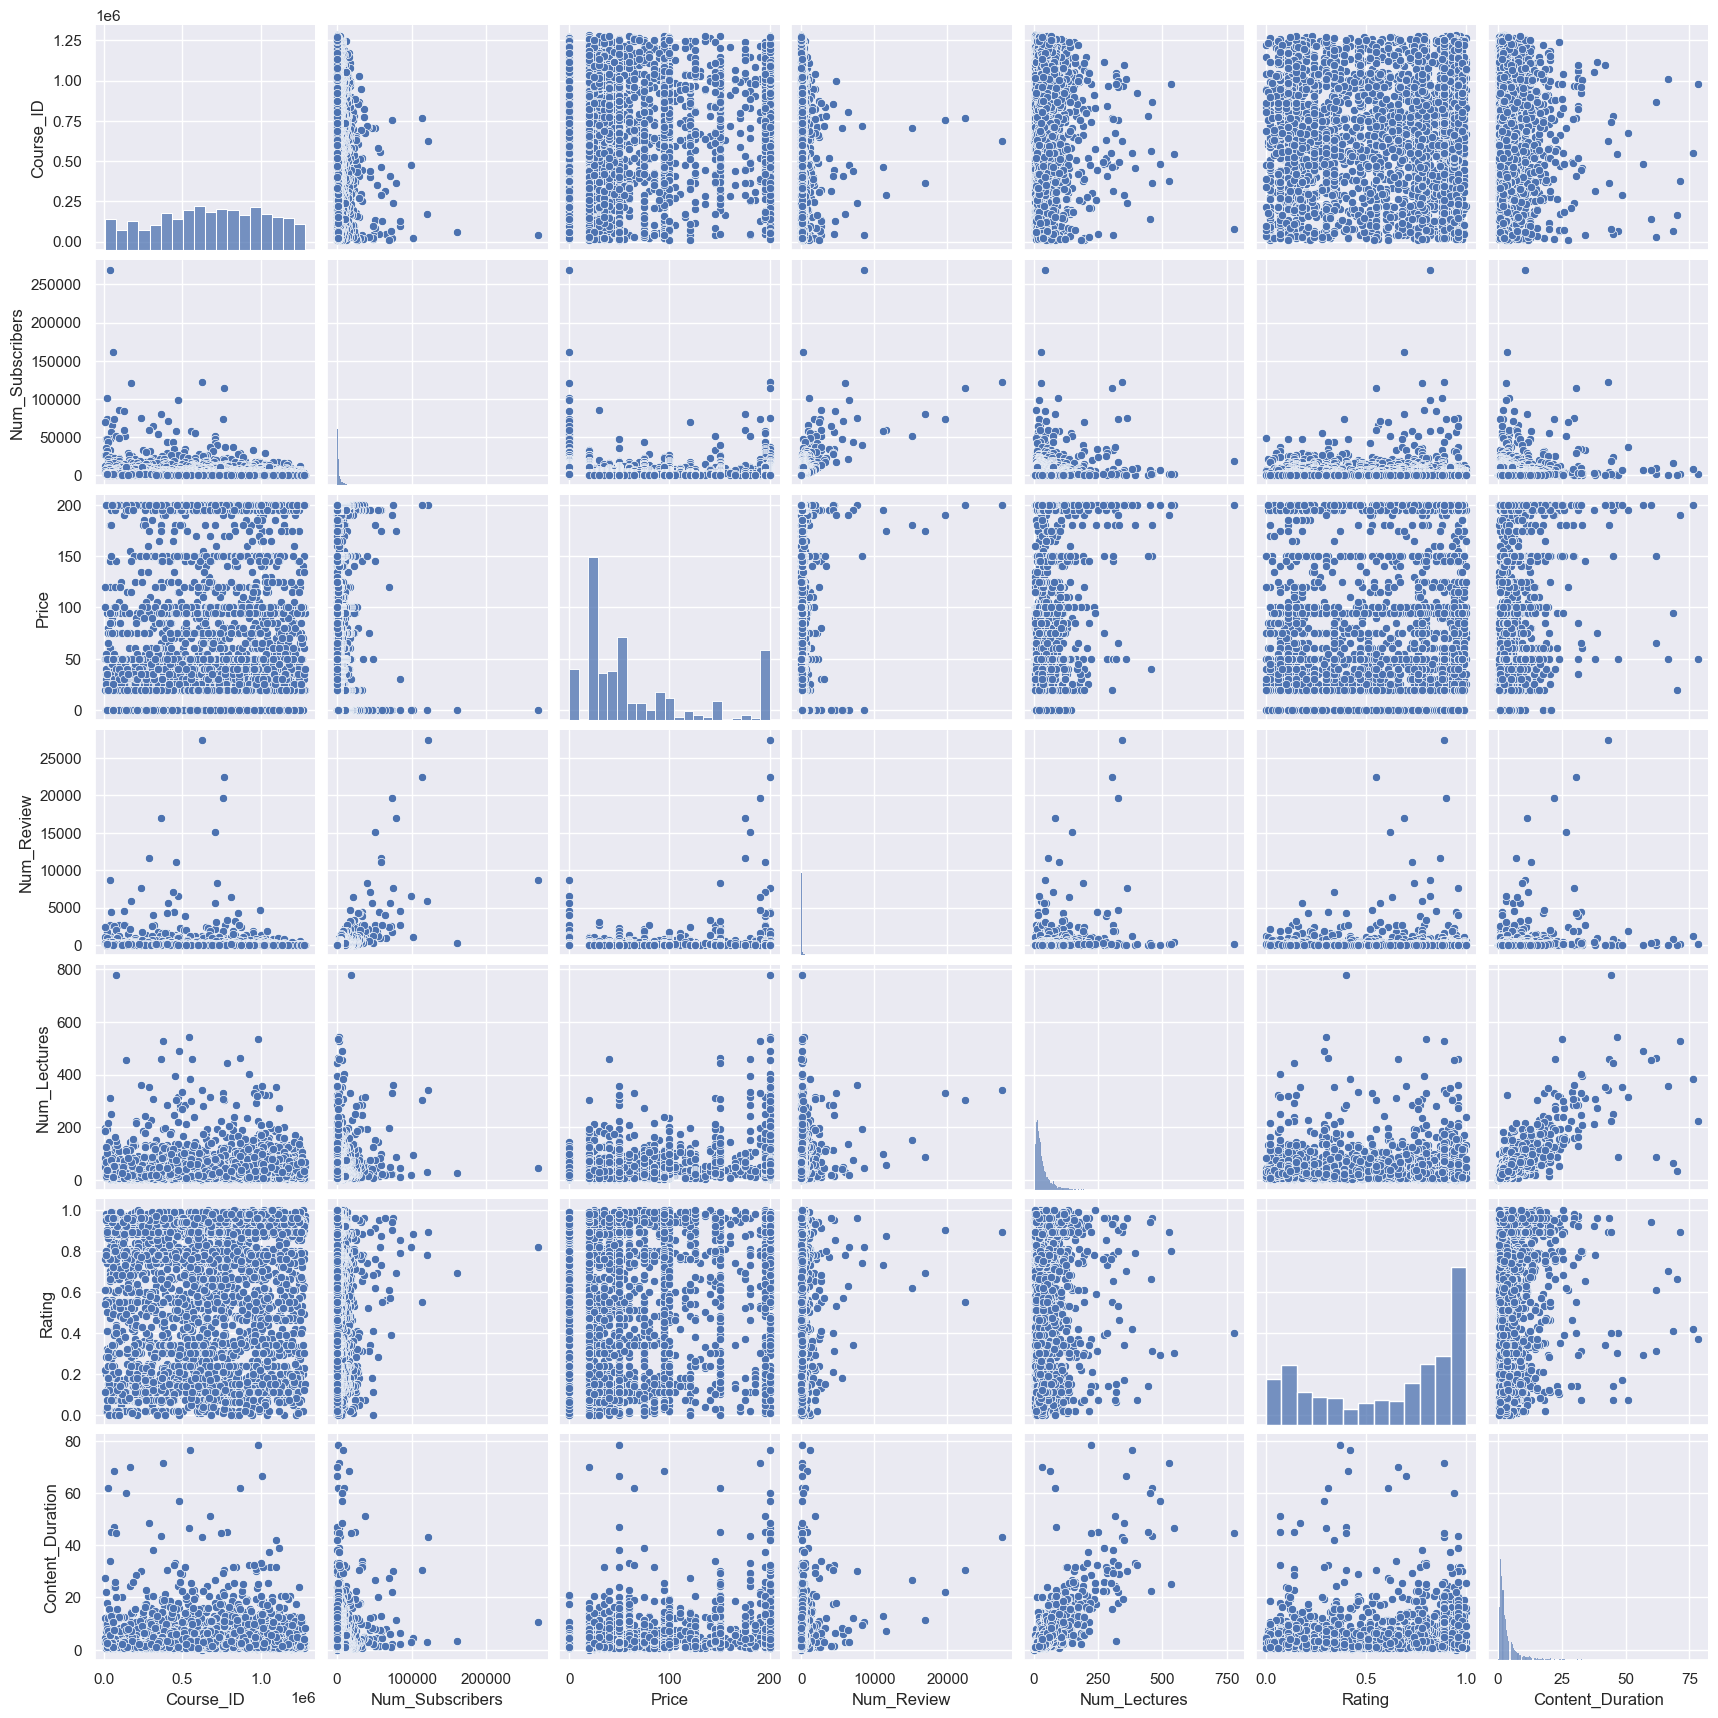

In [19]:
sns.pairplot(df, size=2.5);

In [40]:
EdSigh_profile = ProfileReport(df)
EdSigh_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

CONCLUSION & RECOMMENDATION
1. For a business that have started since 2010, It is observed that they focus more on Web developement course. They need to add more courses and focus on it.

2. Web Dev and Business Finance are the most subscribed course with corresponding subsribers while Musical and graphics have very low subsribers. We may need to change the methodology/trainers and make the least considered courses more enviable and worth peoples's time and effort.

3. Graphics Design can be merged with Web Dev with rich content to appeal to subscirbers. Also, more interesting courses can be introduced that will appease to the conscious of subscriber and inturn genrate good revenue for the business at large.